In [1]:
import pandas as pd

# Replace the path with your actual file path
file_path = r'C:\Users\Saumy\Downloads\retail_sales_dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head(10))

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  24-11-2023     CUST001    Male   34           Beauty   
1               2  27-02-2023     CUST002  Female   26         Clothing   
2               3  13-01-2023     CUST003    Male   50      Electronics   
3               4  21-05-2023     CUST004    Male   37         Clothing   
4               5  06-05-2023     CUST005    Male   30           Beauty   
5               6  25-04-2023     CUST006  Female   45           Beauty   
6               7  13-03-2023     CUST007    Male   46         Clothing   
7               8  22-02-2023     CUST008    Male   30      Electronics   
8               9  13-12-2023     CUST009    Male   63      Electronics   
9              10  07-10-2023     CUST010  Female   52         Clothing   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30 

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Convert categorical variables to numerical values
df['Product Category'] = df['Product Category'].astype('category').cat.codes
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})



In [4]:
# Select relevant columns
data = df[['Age', 'Product Category', 'Gender']]

In [5]:
df.head(10)

Transaction ID        Date Customer ID  Gender  Age  Product Category  \
0               1  24-11-2023     CUST001       0   34                 0   
1               2  27-02-2023     CUST002       1   26                 1   
2               3  13-01-2023     CUST003       0   50                 2   
3               4  21-05-2023     CUST004       0   37                 1   
4               5  06-05-2023     CUST005       0   30                 0   
5               6  25-04-2023     CUST006       1   45                 0   
6               7  13-03-2023     CUST007       0   46                 1   
7               8  22-02-2023     CUST008       0   30                 2   
8               9  13-12-2023     CUST009       0   63                 2   
9              10  07-10-2023     CUST010       1   52                 1   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
5         1              30            30  
6         2              25            50  
7         4              25           100  
8         2             300           600  
9         4              50           200

In [6]:
df.nunique()

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

In [7]:
#Standarizing the data for clustering
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


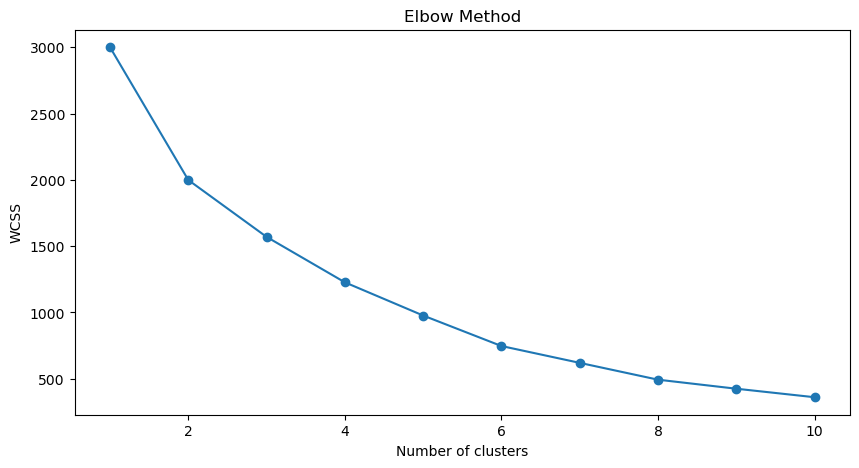

In [9]:
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [10]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original DataFrame
df['Cluster'] = clusters


# Age and Total Spending without and with centroids


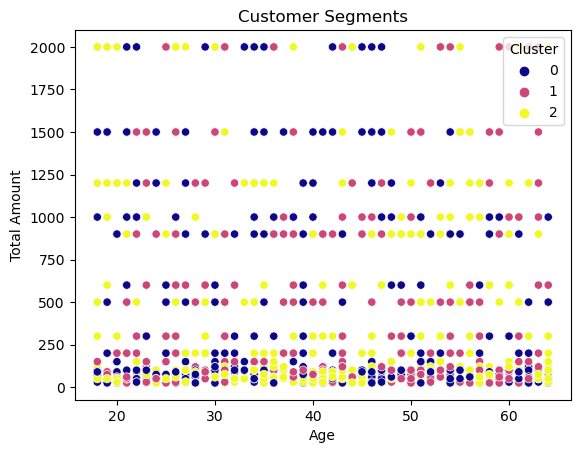

In [11]:
sns.scatterplot(x='Age', y='Total Amount', hue='Cluster', data=df, palette='plasma')
plt.title('Customer Segments')
plt.show()

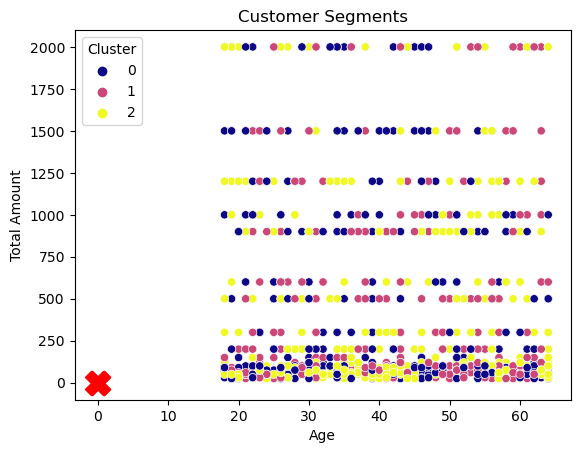

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the centroids
centroids = kmeans.cluster_centers_

# Create the scatter plot
sns.scatterplot(x='Age', y='Total Amount', hue='Cluster', data=df, palette='plasma')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

# Add title and legend
plt.title('Customer Segments')
plt.show()


# Gender and Total Spending with and without centroids

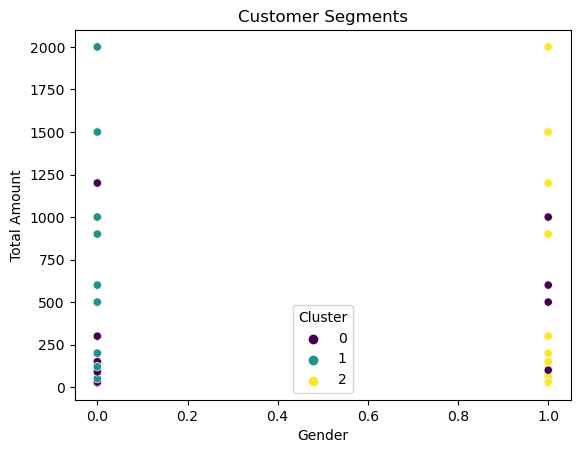

In [13]:
sns.scatterplot(x='Gender', y='Total Amount', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segments')
plt.show()

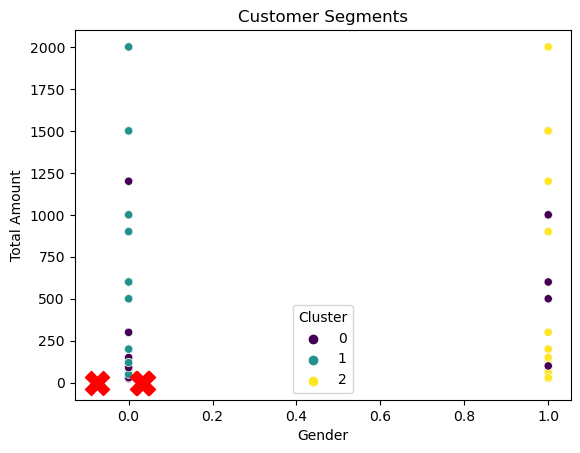

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the centroids
centroids = kmeans.cluster_centers_

# Create the scatter plot
sns.scatterplot(x='Gender', y='Total Amount', hue='Cluster', data=df, palette='viridis')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

# Add title and legend
plt.title('Customer Segments')
plt.show()


# Product Category and Total Spending

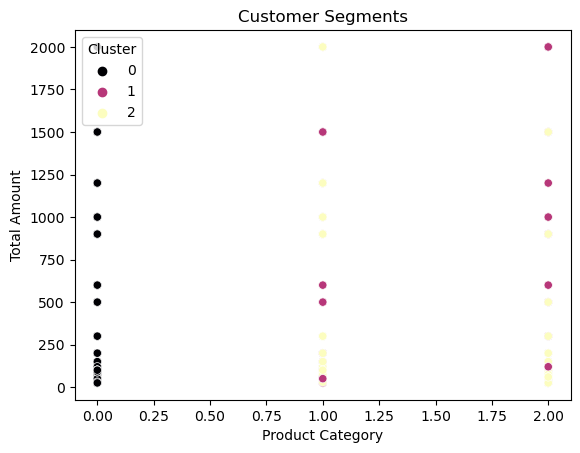

In [15]:
sns.scatterplot(x='Product Category', y='Total Amount', hue='Cluster', data=df, palette='magma')
plt.title('Customer Segments')
plt.show()



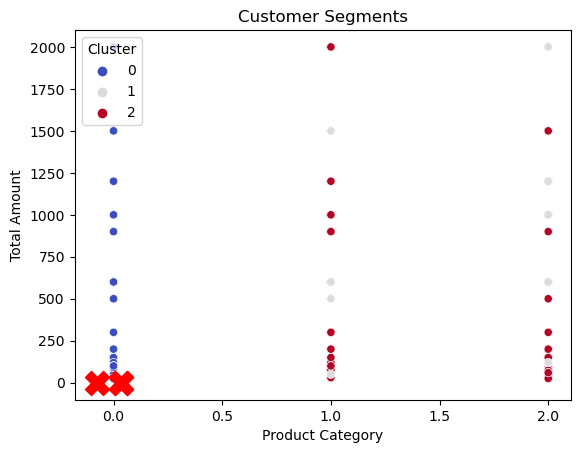

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the centroids
centroids = kmeans.cluster_centers_

# Create the scatter plot
sns.scatterplot(x='Product Category', y='Total Amount', hue='Cluster', data=df, palette='coolwarm')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

# Add title and legend
plt.title('Customer Segments')
plt.show()


In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [18]:
# Adjusting feature selection according to the dataset
features = df.select_dtypes(include=[np.number])


In [19]:
# Standardizing the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [20]:
# Computing the linkage matrix Using 'ward', linkage
linkage_matrix = linkage(scaled_features, method='ward')  

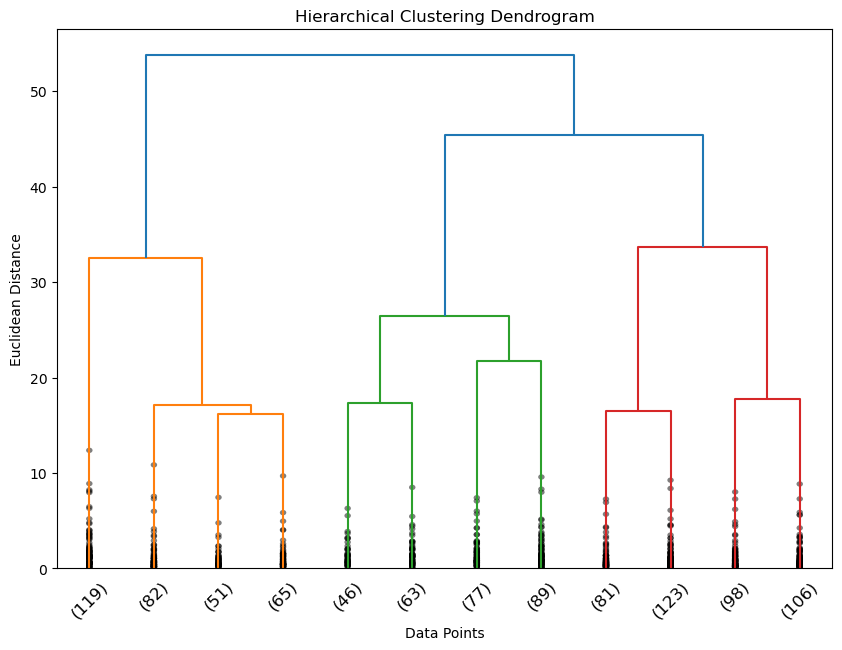

In [21]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
dendrogram(linkage_matrix, truncate_mode="lastp", p=12, leaf_rotation=45., leaf_font_size=12., show_contracted=True)
plt.show()

In [22]:
# Optional: Assign clusters (e.g., k=3)
from scipy.cluster.hierarchy import fcluster
k = 3
 # Adding cluster labels to the dataset
clusters = fcluster(linkage_matrix, k, criterion='maxclust')
df['Cluster_Hierarchical'] = clusters 

#Saving the updated dataset
df.to_csv('hierarchical_clustering_output.csv', index=False)

In [23]:
print(df.to_csv)

<bound method NDFrame.to_csv of      Transaction ID        Date Customer ID  Gender  Age  Product Category  \
0                 1  24-11-2023     CUST001       0   34                 0   
1                 2  27-02-2023     CUST002       1   26                 1   
2                 3  13-01-2023     CUST003       0   50                 2   
3                 4  21-05-2023     CUST004       0   37                 1   
4                 5  06-05-2023     CUST005       0   30                 0   
..              ...         ...         ...     ...  ...               ...   
995             996  16-05-2023     CUST996       0   62                 1   
996             997  17-11-2023     CUST997       0   52                 0   
997             998  29-10-2023     CUST998       1   23                 0   
998             999  05-12-2023     CUST999       1   36                 2   
999            1000  12-04-2023    CUST1000       0   47                 2   

     Quantity  Price per Unit  